<a href="https://colab.research.google.com/github/AliceAii/Education-Data-Mining/blob/main/EDM_CA1_student-level%2010-cross%20validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics

df = pd.read_csv('ca1-dataset.csv')

In [ ]:
from sklearn import tree
from sklearn.metrics import cohen_kappa_score

In [ ]:
y = df['OffTask']

In [ ]:
y = y.replace(to_replace=['N', 'Y'], value=[0, 1])

In [ ]:
x = df.drop(['OffTask', 'namea', 'Unique-id'], axis=1)

In [ ]:
x

,Avgright,Avgbug,Avghelp,Avgchoice,Avgstring,Avgnumber,Avgpoint,Avgpchange,Avgtime,AvgtimeSDnormed,...,Avghelppct-up,Avgwrongpct-up,Avgtimeperact-up,AvgPrev3Count-up,AvgPrev5Count-up,Avgrecent8help,Avg recent5wrong,Avgmanywrong-up,AvgasymptoteA-up,AvgasymptoteB-up
0,1.000000,0.0,0,0,0,0,0,0.000000,12.000000,0.446098,...,0,0.000000,12.000000,0.000000,0.000000,0,1.000000,0.0,0,0
1,1.000000,0.0,0,0,0,0,0,0.000000,7.500000,-0.260956,...,0,0.000000,8.750000,0.000000,0.000000,0,0.000000,0.0,0,0
2,1.000000,0.0,0,0,0,0,0,0.000000,25.333333,0.301574,...,0,0.000000,26.083333,0.000000,0.000000,0,1.000000,0.0,0,0
3,0.833333,0.0,0,0,0,0,0,0.000000,3.500000,-0.554844,...,0,0.166667,4.902778,0.000000,0.000000,0,0.000000,0.0,0,0
4,1.000000,0.0,0,0,0,0,0,0.000000,5.250000,-0.525770,...,0,0.000000,5.875000,0.000000,0.000000,0,0.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,0.000000,0.0,0,0,0,0,0,1.000000,56.000000,5.110030,...,0,4.000000,17.500000,2.000000,4.000000,0,0.000000,0.0,0,0
759,1.000000,0.0,0,0,0,0,0,0.000000,6.000000,0.042553,...,0,0.000000,6.533333,0.000000,0.000000,0,0.000000,0.0,0,0
760,1.000000,0.0,0,0,0,0,0,0.000000,14.000000,0.339286,...,0,0.000000,17.076923,0.000000,0.000000,0,2.000000,0.0,0,0
761,1.000000,0.0,0,0,0,0,0,0.000000,5.000000,-0.329097,...,0,0.000000,16.777778,0.000000,0.000000,0,0.000000,0.0,0,0


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
from matplotlib import pyplot

[0.19975223 0.         0.         0.         0.         0.
 0.         0.06021681 0.08854242 0.04743927 0.06255217 0.08467897
 0.         0.04000929 0.         0.06104936 0.03979717 0.09150894
 0.17918779 0.         0.04526564 0.         0.         0.        ]


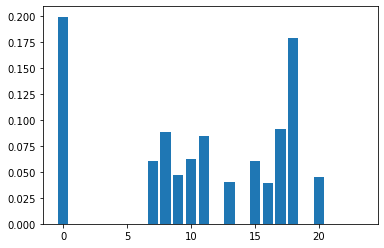

In [ ]:
# fit model no training data
model = XGBClassifier(learning_rate=0.5, n_estimators=200, random_state=5)
model.fit(x, y)

print(model.feature_importances_)

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [ ]:
x


In [ ]:
x1 = df.drop(['OffTask', 'namea', 'Unique-id', 'Avgbug', 'Avghelp', 'Avgchoice', 'Avgstring', 'Avgnumber', 'Avgpoint', 'Avgnotright', 'Avghelppct-up', 'Avgrecent8help', 'Avgmanywrong-up', 'AvgasymptoteA-up', 'AvgasymptoteB-up'], axis=1)

In [ ]:
y = y.replace(to_replace=['N', 'Y'], value=[0, 1])

**XGBoost K Fold Cross Validation, kappa=0.18**



In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#fit model no training data
xgBoost = XGBClassifier()

In [ ]:
kfold = KFold(n_splits=10, random_state=7,shuffle = True)
results = cross_val_score(xgBoost, x1, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 95.67% (1.77%)


In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

In [ ]:
cv = KFold(n_splits=10)

In [ ]:
gkf = GroupKFold(n_splits=10)

In [ ]:
group_dict = {}
groups = np.array([])

In [ ]:
for index, row in df.iterrows():
    student_id = row['namea']
    if student_id not in group_dict:
        group_dict[student_id] = index
    groups = np.append(groups, group_dict[student_id])

In [ ]:
gkf = GroupKFold(n_splits=10)

In [ ]:
kappa_values = list()

for train_index, test_index in gkf.split(x1, y, groups=groups):
    x1_train = x1.iloc[train_index]
    x1_test = x1.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    xgb = XGBClassifier(learning_rate=0.5, n_estimators=200, random_state=5)
    xgb.fit(x1_train, y_train)
    predictions = xgb.predict(x1_test)
    kappa = cohen_kappa_score(y_test, predictions)
    kappa_values.append(kappa)
np.mean(kappa_values)

0.18024570851846064

**Decision Tree with 10-fold cross-validation, kappa=0.22**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.model_selection import GroupKFold

In [ ]:
group_dict = {}
groups = np.array([])

In [ ]:
for index, row in df.iterrows():
    student_id = row['namea']
    if student_id not in group_dict:
        group_dict[student_id] = index
    groups = np.append(groups, group_dict[student_id])

In [ ]:
gkf = GroupKFold(n_splits=10)

In [ ]:
kappa_values = list()

for train_index, test_index in gkf.split(x1, y, groups=groups):
    x1_train = x1.iloc[train_index]
    x1_test = x1.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    clf = tree.DecisionTreeClassifier(min_samples_split=10)
    clf.fit(x1_train, y_train)
    predictions = clf.predict(x1_test)
    kappa = cohen_kappa_score(y_test, predictions)
    kappa_values.append(kappa)
kappa_values

[0.0,
 -0.022408963585434316,
 0.0,
 0.6607929515418502,
 0.3151207115628971,
 -0.01986754966887405,
 0.4744027303754266,
 -0.013157894736842035,
 0.17901234567901236,
 0.11855670103092786]

In [ ]:
print('Mean:',np.mean(kappa_values)) 

Mean: 0.16924510321989636


**Decision Tree Accuracy**

In [ ]:
cv = KFold(n_splits=10)

clf = tree.DecisionTreeClassifier(min_samples_split=10)
fold_accuracy = []
for train_index, valid_index in cv.split(x1):
    train_x,test_x = x1.iloc[train_index],x1.iloc[valid_index]
    train_y,test_y= y.iloc[train_index], y.iloc[valid_index]

    model = clf.fit(train_x,train_y)
    valid_acc = model.score(test_x,test_y)
    fold_accuracy.append(valid_acc)
    print(confusion_matrix(test_y,model.predict(test_x)))

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

[[74  0]
 [ 2  1]]
[[73  2]
 [ 2  0]]
[[74  2]
 [ 1  0]]
[[74  0]
 [ 2  0]]
[[73  1]
 [ 2  0]]
[[75  0]
 [ 1  0]]
[[71  3]
 [ 1  1]]
[[69  2]
 [ 5  0]]
[[68  3]
 [ 4  1]]
[[65  0]
 [ 9  2]]
Accuracy per fold:  [0.974025974025974, 0.948051948051948, 0.961038961038961, 0.9736842105263158, 0.9605263157894737, 0.9868421052631579, 0.9473684210526315, 0.9078947368421053, 0.9078947368421053, 0.881578947368421] 

Average accuracy:  0.9448906356801092


**Decision Tree Visualization**

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

In [ ]:
#visualization - reference Nan Leng's code
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(clf,
               feature_names = list(x1.columns), 
               class_names=['OnTask','OffTask'],
               filled = True)
fig.savefig('cifplot.png')

**Export the Model**

In [ ]:
import pickle

In [ ]:
filename = 'decisiontree_model.sav'
pickle.dump(clf,open(filename,'wb'))

In [ ]:
#export data1
df.to_csv ('df1.csv',index = False)

**10-fold student-level cross-validation using Naive Bayes, kappa=0.12**

In [ ]:
kappa_values = list()

for train_index, test_index in gkf.split(x1, y, groups=groups):
    x1_train = x1.iloc[train_index]
    x1_test = x1.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    gnb = GaussianNB()
    gnb.fit(x1_train, y_train.ravel())
    predictions = gnb.predict(x1_test)
    kappa = cohen_kappa_score(y_test, predictions)
    kappa_values.append(kappa)
kappa_values

[0.0,
 0.22505307855626322,
 -0.05769230769230771,
 -0.021220159151193574,
 -0.04054054054054035,
 0.21160409556313997,
 0.639344262295082,
 -0.017621145374449254,
 0.17901234567901236,
 0.09523809523809523]

In [ ]:
print('Mean:',np.mean(kappa_values)) 

Mean: 0.1213177724573102


In [ ]:
cv = KFold(n_splits=10)

gnb = GaussianNB()
fold_accuracy = []
for train_index, valid_index in cv.split(x1):
    train_x,test_x = x1.iloc[train_index],x1.iloc[valid_index]
    train_y,test_y= y.iloc[train_index], y.iloc[valid_index]

    model = gnb.fit(train_x,train_y)
    valid_acc = model.score(test_x,test_y)
    fold_accuracy.append(valid_acc)
    print(confusion_matrix(test_y,model.predict(test_x)))

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

[[73  1]
 [ 2  1]]
[[71  4]
 [ 0  2]]
[[73  3]
 [ 1  0]]
[[70  4]
 [ 2  0]]
[[72  2]
 [ 1  1]]
[[69  6]
 [ 1  0]]
[[70  4]
 [ 2  0]]
[[67  4]
 [ 3  2]]
[[67  4]
 [ 3  2]]
[[57  8]
 [10  1]]
Accuracy per fold:  [0.961038961038961, 0.948051948051948, 0.948051948051948, 0.9210526315789473, 0.9605263157894737, 0.9078947368421053, 0.9210526315789473, 0.9078947368421053, 0.9078947368421053, 0.7631578947368421] 

Average accuracy:  0.9146616541353383


**Logistic Regression, with 10-fold cross-validation, kappa=0.19**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import cross_val_score # Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, random_state=0)

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [ ]:
logreg.fit(x1_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#make prediction on the training dataset
y_predict = logreg.predict(x1_train)

In [ ]:
#make prediction on the testing dataset
y_predict1 = logreg.predict(x1_test)

In [ ]:
scores = cross_val_score(logreg, x1_train, y_train, cv = 10) 

In [ ]:
np.mean(scores)

0.9528130671506352

In [ ]:
kappa_values = list()

for train_index, test_index in gkf.split(x1, y, groups=groups):
    x1_train = x1.iloc[train_index]
    x1_test = x1.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
    logreg.fit(x1_train, y_train)
    predictions = logreg.predict(x1_test)
    kappa = cohen_kappa_score(y_test, predictions)
    kappa_values.append(kappa)
kappa_values

[0.0,
 0.38655462184873945,
 0.0,
 -0.013157894736842035,
 0.0,
 0.490066225165563,
 0.31858407079646023,
 0.0,
 0.48993288590604034,
 0.2191780821917808]

In [ ]:
print('Mean:',np.mean(kappa_values)) 

Mean: 0.1891157991171742
